In [1]:
print("Hello World")

Hello World


In [8]:
import os 
from dotenv import load_dotenv
load_dotenv()

True

In [ ]:
os.getenv("GOOGLE_API_KEY")

In [12]:
from langchain_google_genai import GoogleGenerativeAI

llm = GoogleGenerativeAI(model="gemini-2.5-flash")

llm.invoke("Hello, how are you?")

"Hello! I'm doing well, thank you for asking. As an AI, I don't experience feelings or physical states, but I'm fully operational and ready to assist you.\n\nHow are you doing today?"

In [13]:
# Re- Reason & Act- Action

In [16]:
from langchain_groq import ChatGroq

llm_groq = ChatGroq(model="llama-3.1-8b-instant", temperature=0, max_tokens=128)

llm_groq.invoke("Hello")

AIMessage(content='Hello. How can I assist you today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 36, 'total_tokens': 46, 'completion_time': 0.012819228, 'completion_tokens_details': None, 'prompt_time': 0.007124469, 'prompt_tokens_details': None, 'queue_time': 0.012412743, 'total_time': 0.019943697}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_020e283281', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019bf2b5-7133-7a31-bd39-c0cd1303bcdb-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 36, 'output_tokens': 10, 'total_tokens': 46})

In [17]:
from langchain.agents import create_agent

tools = []

agent = create_agent(model=llm, tools=tools)

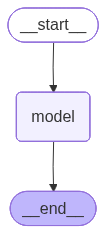

In [18]:
agent

In [19]:
agent.invoke({"messages": [{"role": "user", "content": "Hello there`"}]})

{'messages': [HumanMessage(content='Hello there`', additional_kwargs={}, response_metadata={}, id='0ab9e2d3-1909-46e7-bd0a-c49b9564ce22'),
  HumanMessage(content='Hello! How can I help you today?', additional_kwargs={}, response_metadata={}, id='75effdd8-92b6-47fc-beb1-201555b0cbc8')]}

In [20]:
from langchain.tools import tool

@tool
def multiply_two_numbers(x: int, y: int) -> int:
    """
    Multiplies two numbers
    
    Args:
        x (int): First number
        y (int): Second number
    
    Returns:
        int: Product of the two numbers
    """
    return x*y

In [27]:
tools = [multiply_two_numbers]

agent_with_tools = create_agent(model=llm_groq, tools=tools)

In [28]:
agent_with_tools.invoke({"messages": [{"role": "user", "content": "What is 2*2?"}]})

{'messages': [HumanMessage(content='What is 2*2?', additional_kwargs={}, response_metadata={}, id='95990258-bb41-4f14-a58f-a6bca6ad2ac6'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '30jkr3fvm', 'function': {'arguments': '{"x":2,"y":2}', 'name': 'multiply_two_numbers'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 287, 'total_tokens': 308, 'completion_time': 0.030565229, 'completion_tokens_details': None, 'prompt_time': 0.017887951, 'prompt_tokens_details': None, 'queue_time': 0.005418241, 'total_time': 0.04845318}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_020e283281', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019bf2c9-19b6-7622-b6e3-afcfb2d9f9fd-0', tool_calls=[{'name': 'multiply_two_numbers', 'args': {'x': 2, 'y': 2}, 'id': '30jkr3fvm', 'type': 'tool_call'}], invalid_tool_calls=[], usage_metadata={'input_tokens'

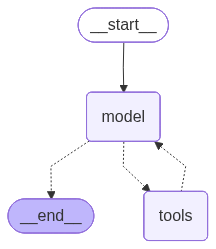

In [29]:
agent_with_tools

In [30]:
import requests

In [34]:
@tool
def get_weather(city: str) -> dict:
    """Get the current weather for a given city"""
    try: 
        geo_url = f"https://geocoding-api.open-meteo.com/v1/search?name={city}&count=1&language=en&format=json"
        geo_data = requests.get(geo_url).json()

        if not geo_data.get("results"):
            return {"error": "City not found"}

        lat, lon = geo_data["results"][0]["latitude"], geo_data["results"][0]["longitude"]

        weather_url = f"https://api.open-meteo.com/v1/forecast?latitude={lat}&longitude={lon}&current=temperature_2m,weather_code"

        weather_data = requests.get(weather_url).json()

        if not weather_data.get("current"):
            return {"error": "Weather data not found"}
        
        temp = weather_data["current"]["temperature_2m"]

        return  {"city": city, "temperature": temp, "unit": "C"}


    except Exception as e:
        return {"error": str(e)}

In [39]:
print(get_weather.invoke("farmington hills"))

{'city': 'farmington hills', 'temperature': -15.5, 'unit': 'C'}


In [40]:
tools_with_weather = [get_weather, multiply_two_numbers]

weather_agent = create_agent(model=llm_groq, tools=tools_with_weather)

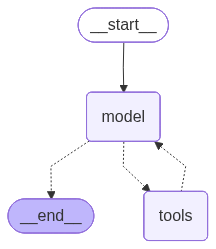

In [41]:
weather_agent

In [49]:
weather_agent.invoke({"messages": [{"role":"user", "content":"What is the weather like in New York?"}]})

{'messages': [HumanMessage(content='What is the weather like in New York?', additional_kwargs={}, response_metadata={}, id='e33e3432-08db-458a-ae34-3896daa03807'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '8fdrytr8b', 'function': {'arguments': '{"city":"New York"}', 'name': 'get_weather'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 344, 'total_tokens': 360, 'completion_time': 0.030433776, 'completion_tokens_details': None, 'prompt_time': 0.0450789, 'prompt_tokens_details': None, 'queue_time': 0.072570451, 'total_time': 0.075512676}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_6c980774ec', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019bf2ec-7a59-76d1-8d29-bffd2a121ac5-0', tool_calls=[{'name': 'get_weather', 'args': {'city': 'New York'}, 'id': '8fdrytr8b', 'type': 'tool_call'}], invalid_tool_calls=[], usage_metadata

In [27]:
from langchain_groq import ChatGroq
from langchain.agents import create_agent 

In [ ]:
import os
from dotenv import load_dotenv
import requests
load_dotenv()

True

In [21]:
from langchain.tools import tool

In [22]:
@tool
def get_nodes() -> list:
    """
    Get all pending notes from Notion
    """
    api_key = os.getenv("NOTION_API_KEY")
    db_id = os.getenv("NOTION_DB_ID")
    
    if not api_key or not db_id:
        raise ValueError("NOTION_API_KEY or NOTION_DB_ID not found")

    headers = {
        "Authorization" : f"Bearer {api_key}",
        "content-type": "application/json",
        "Notion-Version": "2022-06-28" # Use a valid API version
    }    

    # Added 'f' prefix so {db_id} is replaced with the actual ID
    url = f"https://api.notion.com/v1/databases/{db_id}/query"

    payload = {
        "filter": {
            "property": "Status",
            "select": {
                "equals": "Pending"
            }
        }
    }

    try:
        response = requests.post(url, headers=headers, json=payload)
        if response.status_code != 200:
             # Print the actual error message from Notion for easier debugging
             raise ValueError(f"Error fetching nodes: {response.status_code} - {response.text}")
             
        data = response.json()

        nodes = []
        for page in data.get("results", []):
            props = page.get("properties", {})
            # Only proceed if we find the title property list
            title_list = props.get("Note", {}).get("title", [])
            if title_list:
                note_content = title_list[0].get("text", {}).get("content", "")
                nodes.append(note_content)
            else:
                nodes.append("Untitled Note")

        return nodes
            
    except Exception as e:
        raise ValueError(f"Failed to fetch nodes from Notion: {e}")

@tool
def add_note(note: str) -> str:
    """
    Add a new note to Notion
    """
    api_key = os.getenv("NOTION_API_KEY")
    db_id = os.getenv("NOTION_DB_ID")

    if not api_key or not db_id:
        raise ValueError("NOTION_API_KEY or NOTION_DB_ID not found")

    headers = {
        "Authorization" : f"Bearer {api_key}",
        "content-type": "application/json",
        "Notion-Version": "2022-06-28" 
    }    

    url = "https://api.notion.com/v1/pages"

    payload = {
        "parent": {
            "database_id": db_id
        },
        "properties": {
            "Note": {
                "title": [
                    {
                        "text": {
                            "content": note
                        }
                    }
                ]
            },
            "Status": {
                "select": {
                    "name": "Pending"
                }
            }
        }
    }

    try:
        response = requests.post(url, headers=headers, json=payload)
        if response.status_code != 200:
            raise ValueError(f"Error adding note: {response.status_code} - {response.text}")

        return f"Note added successfully: {note}"
            
    except Exception as e:
        raise ValueError(f"Failed to add note to Notion: {str(e)}")

In [23]:
get_nodes.invoke("")

['Test Note']

In [24]:
notes_tool = [get_nodes, add_note]

In [ ]:
llm_groq = ChatGroq(model='llama-3.1-8b-instant', temperature=0, max_tokens=128)

notion_notes_agent = create_agent(model=llm_groq, tools=notes_tool)

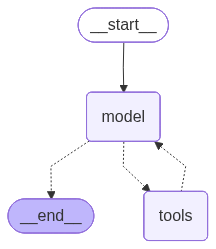

In [28]:
notion_notes_agent

In [30]:
notion_notes_agent.invoke({"messages":[("user", "tell me the current notes i have in my notion")]})

{'messages': [HumanMessage(content='tell me the current notes i have in my notion', additional_kwargs={}, response_metadata={}, id='c30c4614-7743-4598-9056-42298565f11d'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '571tp5gs9', 'function': {'arguments': '{}', 'name': 'get_nodes'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 8, 'prompt_tokens': 268, 'total_tokens': 276, 'completion_time': 0.008934102, 'completion_tokens_details': None, 'prompt_time': 0.017926824, 'prompt_tokens_details': None, 'queue_time': 0.005574023, 'total_time': 0.026860926}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_66c49b4aa6', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c6990-5067-7921-8a8d-be7481950b21-0', tool_calls=[{'name': 'get_nodes', 'args': {}, 'id': '571tp5gs9', 'type': 'tool_call'}], invalid_tool_calls=[], usage_metadata={'input_tokens': 268, 'output

{'messages': [HumanMessage(content='tell me the current notes i have in my notion', additional_kwargs={}, response_metadata={}, id='c30c4614-7743-4598-9056-42298565f11d'),
  
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '571tp5gs9', 'function': {'arguments': '{}', 'name': 'get_nodes'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 8, 'prompt_tokens': 268, 'total_tokens': 276, 'completion_time': 0.008934102, 'completion_tokens_details': None, 'prompt_time': 0.017926824, 'prompt_tokens_details': None, 'queue_time': 0.005574023, 'total_time': 0.026860926}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_66c49b4aa6', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c6990-5067-7921-8a8d-be7481950b21-0', tool_calls=[{'name': 'get_nodes', 'args': {}, 'id': '571tp5gs9', 'type': 'tool_call'}], invalid_tool_calls=[], usage_metadata={'input_tokens': 268, 'output_tokens': 8, 'total_tokens': 276}),
  
  ToolMessage(content='["Test Note"]', name='get_nodes', id='086a4c77-4a9d-4cd5-96c3-ff5388f510e4', tool_call_id='571tp5gs9'),

  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '7hd7mk9zv', 'function': {'arguments': '{}', 'name': 'get_nodes'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 291, 'total_tokens': 300, 'completion_time': 0.009185298, 'completion_tokens_details': None, 'prompt_time': 0.018385693, 'prompt_tokens_details': None, 'queue_time': 0.005582275, 'total_time': 0.027570991}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_8f8420ecd7', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c6990-5ecc-7603-85a6-be2a1140c37b-0', tool_calls=[{'name': 'get_nodes', 'args': {}, 'id': '7hd7mk9zv', 'type': 'tool_call'}], invalid_tool_calls=[], usage_metadata={'input_tokens': 291, 'output_tokens': 9, 'total_tokens': 300}),
  
  ToolMessage(content='["Test Note"]', name='get_nodes', id='d25ac745-73b7-43a2-9f4b-6d813b7be912', tool_call_id='7hd7mk9zv'),
  
  AIMessage(content='It seems like the function get_nodes is not returning the expected output. Let me try again.\n\n', additional_kwargs={'tool_calls': [{'id': 'nhed0vv7t', 'function': {'arguments': '{}', 'name': 'get_nodes'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 28, 'prompt_tokens': 314, 'total_tokens': 342, 'completion_time': 0.074372144, 'completion_tokens_details': None, 'prompt_time': 0.133331722, 'prompt_tokens_details': None, 'queue_time': 0.007468895, 'total_time': 0.207703866}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_020e283281', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c6990-6107-74b1-9da0-ac8a6e763537-0', tool_calls=[{'name': 'get_nodes', 'args': {}, 'id': 'nhed0vv7t', 'type': 'tool_call'}], invalid_tool_calls=[], usage_metadata={'input_tokens': 314, 'output_tokens': 28, 'total_tokens': 342}),
  ToolMessage(content='["Test Note"]', name='get_nodes', id='8fa6e8fd-fe8a-42ec-875e-af0c0937e08e', tool_call_id='nhed0vv7t'),

  AIMessage(content='It seems like you have a repeating note called "Test Note".', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 14, 'prompt_tokens': 337, 'total_tokens': 351, 'completion_time': 0.032564494, 'completion_tokens_details': None, 'prompt_time': 0.04625886, 'prompt_tokens_details': None, 'queue_time': 0.006713796, 'total_time': 0.078823354}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_66c49b4aa6', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c6990-6464-76d3-90ef-2027de06d31b-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 337, 'output_tokens': 14, 'total_tokens': 351})]}

should do prompting to reduce the repated calling

In [31]:
notion_notes_agent.invoke({"messages": "If there is only one note in the notion add one more with a name Learn langchain"})

{'messages': [HumanMessage(content='If there is only one note in the notion add one more with a name Learn langchain', additional_kwargs={}, response_metadata={}, id='cd7c1f35-b531-41de-8636-8e221c99a1f8'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '6djreasgv', 'function': {'arguments': '{"note":"Learn langchain"}', 'name': 'add_note'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 276, 'total_tokens': 292, 'completion_time': 0.027594979, 'completion_tokens_details': None, 'prompt_time': 0.08102889, 'prompt_tokens_details': None, 'queue_time': 0.192906312, 'total_time': 0.108623869}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_4387d3edbb', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c699d-0875-7b72-9ac0-4703545ee917-0', tool_calls=[{'name': 'add_note', 'args': {'note': 'Learn langchain'}, 'id': '6djreasgv', 'type': 

## Calender Tool

In [ ]:
def 